# Linear Regression - Insurance Dataset

## Import

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()

## Check Missing Values and Outliers

In [18]:
# Read the dataset
insurance_df = pd.read_csv('data/insurance.csv')

# Display the first 10 elements
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
# Info about the data, including shapes and individual columns
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
# Check for the null values 
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,expenses
False,1338,1338,1338,1338,1338,1338,1338


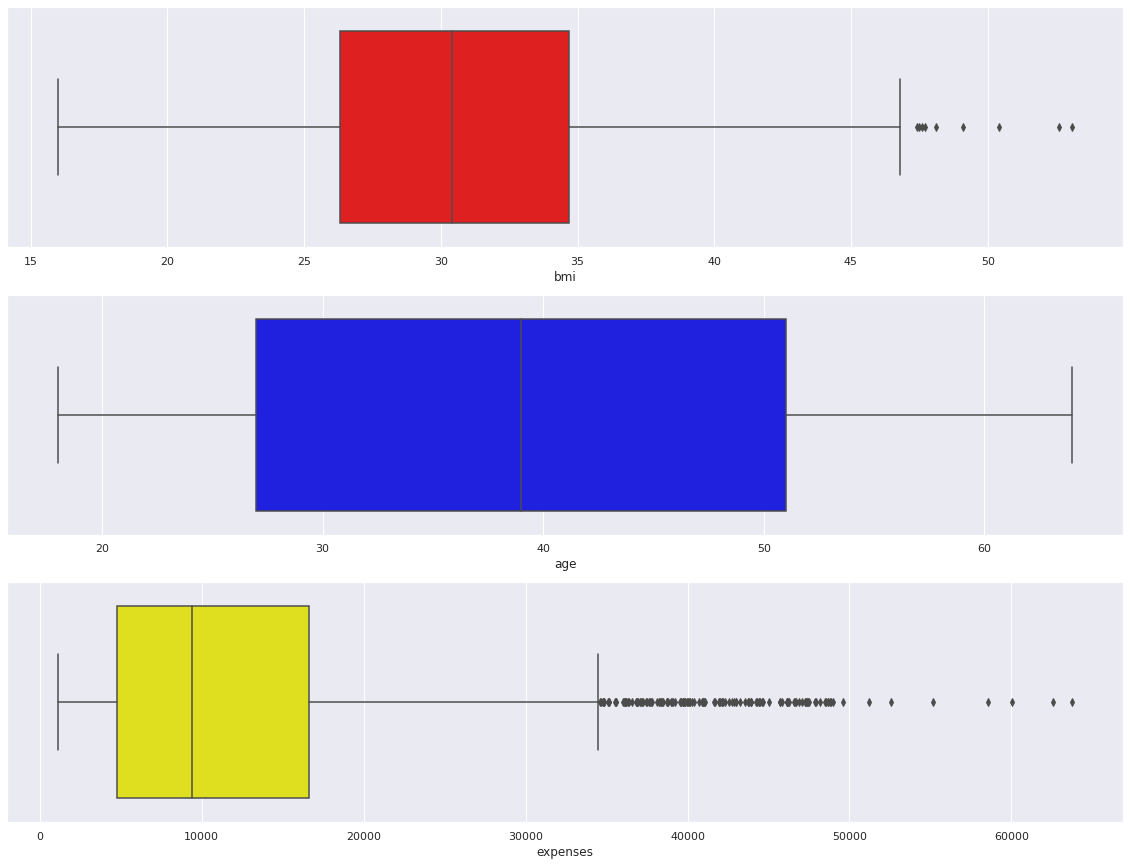

In [21]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.expenses, color='yellow')

plt.show()

Interesting output for this analysis:
* bmi has a few extreme values;
* expenses as it is highly skewed, there are quiet a lot of extreme values.

In [22]:
# a brief summary for the dataset
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


### Age field
* 50% of the people has 39 years

In [23]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.figure(figsize= (20,15))
plt.subplot(3,3,2)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.figure(figsize= (20,15))
plt.subplot(3,3,2)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

### Write the code to show age and charges graphs, same as we did for bmi

plt.show()

Output should include this Analysis:

- bmi looks normally distributed.

- Age looks uniformly distributed.

- As seen in the previous step, charges are highly skewed

In [ ]:
# showing the skewness of variables
Skewness =  pd.DataFrame({'Skeweness' : [stats.skew(insurance_df.bmi), stats.skew(insurance_df.age), stats.skew(insurance_df.charges)]},
                         index=['bmi','age','charges'])
# We Will Measure the skeweness of the required columns
Skewness

Output should include this Analysis:

- Skewness of bmi is very low as seen in the previous step

- age is uniformly distributed and thus not skewed

- charges are highly skewed

In [ ]:
# visualizing data to make analysis

plt.figure(figsize=(20,25))


x = insurance_df.smoker.value_counts().index    #Values for x-axis
y = [insurance_df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = insurance_df.sex.value_counts().index    #Values for x-axis
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count ')
plt.title('Gender distribution')

x2 = insurance_df.region.value_counts().index    #Values for x-axis
y2 = [insurance_df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title('Region distribution')

x3 = insurance_df.children.value_counts().index    #Values for x-axis
y3 = [insurance_df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title('Children distribution')


plt.show()


- There are lot more non-smokers than smokers.

- Instances are distributed evenly accross all regions.

- Gender is also distributed evenly.

- Most instances have less than 3 children and very few have 4 or 5 children.

In [ ]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

insurance_df_encoded = copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

Output should include this Analysis:

- There is an obvious correlation between 'charges' and 'smoker'

- Looks like smokers claimed more money than non-smokers

- There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

In [ ]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()

In [ ]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.sex,palette= ['pink','lightblue'] )

In [ ]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker =="yes"].charges)
y = np.array(insurance_df[insurance_df.smoker =="no"].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

In [ ]:
#Does bmi of males differ significantly from that of females?
print ("Does bmi of males differ significantly from that of females?")
insurance_df.sex.value_counts()   #Checking the distribution of males and females

In [ ]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex =="male"].bmi)
y = np.array(insurance_df[insurance_df.sex =="female"].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

In [24]:
#Is the proportion of smokers significantly different in different genders?


# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [ ]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

In [25]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female']) 

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.715) > 0.05
